<a href="https://colab.research.google.com/github/dustinak80/Deep_Learning/blob/master/hw2_6373.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()
import io

from PCA import PCA

Saving PCA.py to PCA (1).py


In [0]:
import io
train = pd.read_csv('https://raw.githubusercontent.com/duonghung86/ECG-heartbeat/master/train.csv')
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
count,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,...,14975.000000,14975.00000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000
mean,0.799916,0.681370,0.507636,0.377553,0.337879,0.320125,0.301575,0.278943,0.252831,0.227893,0.212691,0.212222,0.217770,0.222966,0.236370,0.255335,0.271611,0.283323,0.292283,0.300246,0.308590,0.316936,0.325345,0.333564,0.341859,0.349260,0.355848,0.362026,0.367765,0.373537,0.379311,0.385375,0.391135,0.396961,0.401965,0.406527,0.410385,0.413129,0.414515,0.414698,...,0.035157,0.03450,0.033696,0.033243,0.032850,0.032316,0.031402,0.030615,0.030014,0.029380,0.028522,0.027972,0.027299,0.026623,0.025652,0.024647,0.024270,0.023050,0.021476,0.020347,0.018975,0.017786,0.016490,0.015145,0.013682,0.012525,0.011393,0.010550,0.010018,0.009241,0.008379,0.007607,0.007066,0.006343,0.005789,0.005469,0.005118,0.004658,0.004292,1.992654
std,0.311798,0.283744,0.252459,0.258097,0.242415,0.227729,0.221828,0.208321,0.187968,0.177330,0.184693,0.193576,0.200565,0.207150,0.210445,0.213433,0.218985,0.227213,0.235135,0.242995,0.249695,0.256013,0.262345,0.268507,0.273643,0.277478,0.279526,0.280076,0.279735,0.278864,0.277302,0.275709,0.273711,0.271883,0.269953,0.268168,0.265948,0.263515,0.260630,0.257560,...,0.124005,0.12389,0.122557,0.122636,0.123781,0.123762,0.121911,0.120959,0.120202,0.118851,0.116756,0.116675,0.115776,0.113537,0.110627,0.109138,0.108726,0.105841,0.101240,0.098228,0.094123,0.090179,0.087146,0.082731,0.077640,0.073646,0.070344,0.068061,0.066044,0.062136,0.058480,0.055797,0.054111,0.051435,0.049350,0.048307,0.046889,0.044675,0.042362,1.662349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.746667,0.523810,0.336364,0.159003,0.134047,0.122007,0.097115,0.086957,0.087168,0.087645,0.080303,0.070543,0.066528,0.066390,0.075028,0.085481,0.089863,0.089102,0.087610,0.084876,0.085575,0.086292,0.090129,0.093353,0.096530,0.099379,0.102801,0.106981,0.110280,0.114063,0.123371,0.136552,0.149630,0.162635,0.175468,0.184950,0.191728,0.195733,0.199139,0.202670,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [0]:
test = pd.read_csv('https://raw.githubusercontent.com/duonghung86/ECG-heartbeat/master/test.csv')
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
count,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,...,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000
mean,0.799025,0.680291,0.507333,0.376405,0.336908,0.320098,0.302768,0.280299,0.253908,0.228025,0.212455,0.212976,0.220442,0.226337,0.240193,0.259333,0.276309,0.288133,0.296944,0.304840,0.313407,0.321647,0.330121,0.338515,0.346835,0.353873,0.360220,0.366660,0.372666,0.378729,0.384734,0.390582,0.396664,0.402818,0.407858,0.412101,0.416340,0.419027,0.420634,0.420336,...,0.035100,0.034511,0.033702,0.032435,0.032257,0.031018,0.031184,0.031564,0.030944,0.030887,0.030186,0.029819,0.029225,0.028483,0.026561,0.025343,0.024054,0.022974,0.022653,0.021607,0.020309,0.018961,0.017937,0.016565,0.016013,0.015098,0.014547,0.012907,0.011790,0.010712,0.010124,0.009574,0.008994,0.008136,0.007374,0.006607,0.006500,0.005914,0.005388,1.992521
std,0.307718,0.281333,0.253401,0.259073,0.244965,0.230098,0.224110,0.210778,0.188491,0.174237,0.180536,0.190680,0.197350,0.204187,0.207536,0.211471,0.218229,0.226341,0.235008,0.243347,0.249819,0.256666,0.263351,0.269578,0.275011,0.278858,0.280810,0.281378,0.281779,0.281400,0.280225,0.279200,0.278183,0.277056,0.275659,0.273719,0.271804,0.269543,0.266392,0.262212,...,0.123467,0.122312,0.120548,0.118346,0.119383,0.118423,0.120162,0.121838,0.122192,0.123047,0.122672,0.123193,0.123352,0.119862,0.114080,0.110802,0.107344,0.103473,0.105195,0.104293,0.100305,0.096346,0.093249,0.088237,0.087424,0.085252,0.083951,0.076844,0.071115,0.065686,0.063735,0.062562,0.061877,0.059788,0.056240,0.054433,0.054871,0.050580,0.048356,1.662379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.739614,0.523387,0.329928,0.159760,0.134179,0.121246,0.095348,0.082707,0.087056,0.087849,0.080736,0.071930,0.069244,0.068180,0.076892,0.085236,0.092076,0.090052,0.087124,0.083260,0.084226,0.085020,0.088585,0.092047,0.095884,0.098709,0.101156,0.104292,0.108274,0.112826,0.123176,0.136501,0.149622,0.162194,0.176029,0.185430,0.191242,0.198312,0.201042,0.206283,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [0]:
#Split test and train into x and y's
train_x = train.iloc[:,0:187]
train_y = train.iloc[:, 187]

test_x = test.iloc[:, 0:187]
test_y = test.iloc[:, 187]

What type of matrix do you want to complete PCA on?

Sum of eig vectors squared: 1.0

Sum of eigen values: 187.00000000000037

Eigen Values and Vectors saved
Is the x and y split?
y


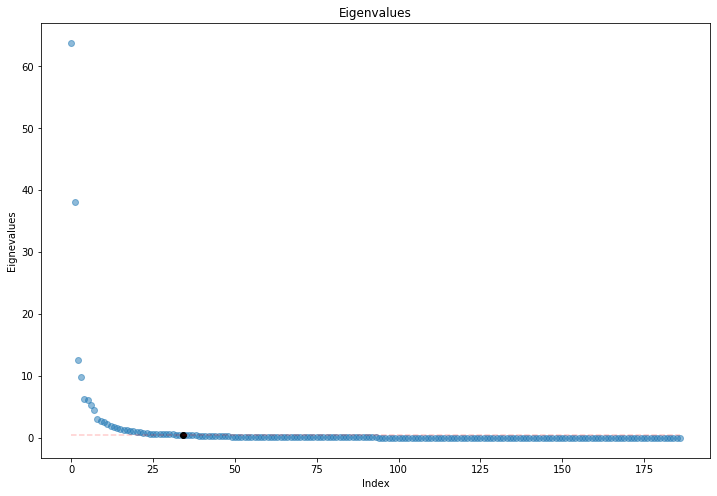

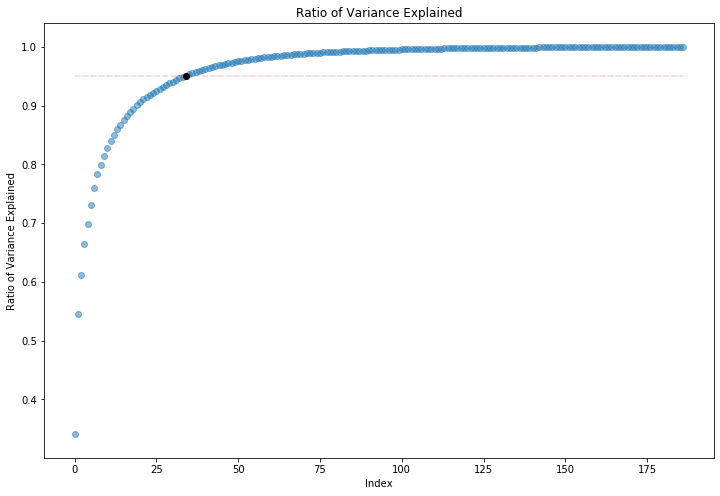

In [0]:
#intialize
pca = PCA()

#Perform
pca.perform_PCA(train_x)
train_xp, test_xp = pca.project(train_x, test_x, .95)
pca.plot()

In [0]:
pca._PCA__desire

(0.95, 34)

In [0]:
#split into groups
train_y.unique()
#Group 0 - 5200
#Group 2 - 4630
#Group 4 - 5145

zero = list(train_y[train_y==0].index)
two = list(train_y[train_y==2].index)
four = list(train_y[train_y==4].index)

In [0]:
#PCA group 0
pca_0 = PCA()
pca_0.perform_PCA(train_x.iloc[zero, :])
pca_0.get_ratios()

What type of matrix do you want to complete PCA on?

Sum of eig vectors squared: 1.0000000000000002

Sum of eigen values: 187.00000000000009

Eigen Values and Vectors saved
What is the ratio of variance you want explained? (Use Decimal Format)
.95
What is the next ratio of variance you want explained? (Use Decimal Format)

desired variance was 0.95 but actual was 0.9520261316848461 with an index of 41



In [0]:
#PCA grou 2
pca_2 = PCA()
pca_2.perform_PCA(train_x.iloc[two, :])
pca_2.get_ratios()

What type of matrix do you want to complete PCA on?

Sum of eig vectors squared: 0.9999999999999993

Sum of eigen values: 187.00000000000017

Eigen Values and Vectors saved
What is the ratio of variance you want explained? (Use Decimal Format)
.95
What is the next ratio of variance you want explained? (Use Decimal Format)

desired variance was 0.95 but actual was 0.9510018310503313 with an index of 28



In [0]:
#PCA grou 4
pca_4 = PCA()
pca_4.perform_PCA(train_x.iloc[four, :])
pca_4.get_ratios()

What type of matrix do you want to complete PCA on?

FYI: there were null values. They were filled with 0. May want to look into this.

Sum of eig vectors squared: (0.9999999999999987+0j)

Sum of eigen values: (183.0000000000002+0j)

Eigen Values and Vectors saved
What is the ratio of variance you want explained? (Use Decimal Format)
.95
What is the next ratio of variance you want explained? (Use Decimal Format)

desired variance was 0.95 but actual was (0.9504317321387271+0j) with an index of 19



In [0]:
#Sum up all of the index values
hl = 3 + pca_0._PCA__variance[.95][1]+pca_2._PCA__variance[.95][1]+pca_4._PCA__variance[.95][1]
#Group 0 - 41 eigenvalues for 95%
#Group 2 - 28 eigenvalues for 95%
#Group 4 - 20 eigenvalues for 95%

In [0]:
def convert(x):
  if x == 0:
    y = [1,0,0]
  elif x == 2:
    y = [0,1,0]
  elif x == 4:
    y = [0,0,1]
  return(y)

In [0]:
train_yy = {}
for i in range(len(train)):
  train_yy[i] = convert(train_y[i])

train_yy = pd.DataFrame(train_yy).T
train_yy.rename(columns = {1:2, 2:4}, inplace=True)
train_yy.head()

,0,2,4
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [0]:
test_yy = {}
for i in range(len(test)):
  test_yy[i] = convert(test_y[i])

test_yy = pd.DataFrame(test_yy).T
test_yy.rename(columns = {1:2, 2:4}, inplace=True)
test_yy.head()

,0,2,4
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0


In [0]:
import tensorflow as tf
import math
from numpy import linalg as LA

In [0]:
# define your parameters here
training_epochs= 30 #100
batch_size=100

global_step=tf.Variable(0,trainable=False)
initial_learning_rate=.01
learning_rate=tf.train.exponential_decay(initial_learning_rate,global_step=global_step,decay_steps=training_epochs,decay_rate=0.90)

add_global=global_step.assign_add(1)

n_hidden= 34 #hl
n_input= 187
n_classes= 3
d=math.sqrt(n_input*n_hidden + n_hidden + n_hidden*n_classes + n_classes)

In [0]:
#tf graph input
X=tf.placeholder("float",[None,n_input])
Y=tf.placeholder("float",[None,n_classes])

#Store layers  weight & bias
weights={
        'h': tf.Variable(tf.random_normal([n_input,n_hidden])),
        'out':tf.Variable(tf.random_normal([n_hidden,n_classes]))
        }

biases={
        'b':tf.Variable(tf.random_normal([n_hidden])),
        'out':tf.Variable(tf.random_normal([n_classes]))
        }

def MLP(x):
    layer_1=tf.add(tf.matmul(x,weights['h']), biases['b'])
    layer_1=tf.nn.relu(layer_1)
    out_layer=tf.matmul(layer_1, weights['out'])+biases['out']

    return out_layer

#construct model
logits=MLP(X)

#define loss and optimizer
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=logits))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
confusion_matrix=tf.math.confusion_matrix(tf.argmax(logits,1),tf.argmax(Y,1))
init=tf.global_variables_initializer()

In [0]:
#training
with tf.Session() as sess:
    sess.run(init) 
    LearningRate=[] #learning rate that is not a tensofrlow object, tracker
    weight={}
    W_change = []
    A=[] #Accuracy
    L=[] #Loss
    gradient=[]
    loss_train=[]
    loss_test=[]
    accuracy_train=[]
    accuracy_test=[]
    sliding_avg = []
    diff_slid_avg = .2 #fill value to keep loop going
    Epoch_n = 0
    Gd = [] #gradient/d 
    Gd_epoch = []

    #store the initial weight and biases
    #store=np.concatenate((np.reshape(sess.run(weights['h']),(1,n_hidden*n_input)),np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden)),np.reshape(sess.run(biases['b']),(1,n_hidden)),np.reshape(sess.run(biases['out']),(1,n_classes))),axis=1)
    store=np.append(np.reshape(sess.run(weights['h']),(1,n_hidden*n_input)),np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden)))
    store=np.append(store,np.reshape(sess.run(biases['b']),(1,n_hidden)))
    store=np.append(store,np.reshape(sess.run(biases['out']),(1,n_classes)))
    print('store: {}\n'.format(len(store))) #6497 for h 

    #Training cycle
    while diff_slid_avg > .00001:
        
        
        # number of batch training for one epoch
        total_batch=int(train_x.shape[0]/batch_size)

        for i in range(total_batch):
           
            #get the current step and the learning rate for the current training
            step,rate=sess.run([add_global,learning_rate])
            LearningRate.append(rate)
            # print(rate)

            #generate the batch, put the number of cases in the training set in ****
            randidx=np.random.randint(len(train_x),size=batch_size) #**
            batch_xs=train_x.iloc[randidx,:]
            batch_ys=train_yy.iloc[randidx,:]
            #print('batch_xs:\n{}'.format(batch_xs))
            #print('batch_ys:\n{}'.format(batch_ys))

            #run the optimizer
            sess.run(optimizer,feed_dict={X:batch_xs,Y:batch_ys})

            #get the loss over the batch training (bavCRE)
            c = sess.run(loss,feed_dict={X:batch_xs,Y:batch_ys})
            L.append(c)
            #print(c, end = ', ')
            #if i % 10 == 0:
              #print()

            #get the accuracy over the batch training
            A.append(sess.run(accuracy,feed_dict={X:batch_xs,Y:batch_ys}))
            
            #get the weight and biases after the current training, and reshape them
            W1=np.reshape(sess.run(weights['h']),(1,n_hidden*n_input))
            W2=np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden))
            W3=np.reshape(sess.run(biases['b']),(1,n_hidden))
            W4=np.reshape(sess.run(biases['out']),(1,n_classes))
            W=np.concatenate((W1,W2,W3,W4),axis=1)
            #norm of the change of weight before training and after training
            WW=LA.norm(W-store)
            #Compute the average size of the change in weights
            W_change += [WW/LA.norm(W)]
            #norm of gradient and ||gradient||/d
            gradient.append(WW/rate)
            Gd.append(gradient[-1]/d)
            #hang on to W(n-1)
            store=W
          
        #every epoch check the accuracy and the loss function of the model on the training set and test set #if step%80==0:
        train_score=sess.run(accuracy,feed_dict={X:train_x,Y:train_yy})
        accuracy_train.append(train_score)
        test_score=sess.run(accuracy,feed_dict={X:test_x,Y:test_yy})
        accuracy_test.append(test_score)
        loss_train.append(sess.run(loss,feed_dict={X:train_x,Y:train_yy})) #avCRE
        loss_test.append(sess.run(loss,feed_dict={X:test_x,Y:test_yy})) #avCRE
        
        #Update
        Epoch_n += 1
        if Epoch_n % 3 == 0:
          #print('\nChange in Accuracy of Train after each epoch:\n{}'.format(accuracy_train[-1]-accuracy_train[-2]))
          #print('\nChange in Accuracy of Test after each epoch:\n{}\n'.format(accuracy_test[-1]-accuracy_test[-2]))
          print('Epoch: {}'.format(Epoch_n))
          diff = accuracy_train[-1]-accuracy_train[-2]
          print('Train: Accuracy = {:.2f}, Loss = {:.2f}'.format(accuracy_test[-1], loss_test[-1]))
          diff = accuracy_test[-1]-accuracy_test[-2]
          print('Test: Accuracy = {:.2f}, Loss = {:.2f}'.format(accuracy_test[-1], loss_test[-1]))
          print('{}\n'.format('- '*30))

        #Update sliding average of Epoch
        Gd_epoch += [np.mean(Gd[-total_batch])] #mean of the last batch

        #Change in average of last 3 Epoch Gradient Sizes
        if len(Gd_epoch) > 3: #average of last 4 Epoch ||G||/d
          sliding_avg += [np.mean(Gd_epoch[-4:])]
          if len(sliding_avg) >= 2:
            diff_slid_avg = np.abs(sliding_avg[-1]-sliding_avg[-2])
            #print(diff_slid_avg)   
        
        #In case not reaching happy point
        if Epoch_n > training_epochs:
          break

        #save the weights after every epoch (only the top 10 Test Scores)
        if len(weight) > 10:
          if test_score > min(weight.keys()):
            weight.pop(min(weight.keys()), None)
            weight[test_score] = W
        else:
          weight[test_score] = W

    #get the predictions to compare for next session
    predictions = sess.run(logits, feed_dict = {X: test_x})

store: 6497

Epoch: 3
Train: Accuracy = 0.63, Loss = 1.38
Test: Accuracy = 0.63, Loss = 1.38
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Epoch: 6
Train: Accuracy = 0.65, Loss = 1.22
Test: Accuracy = 0.65, Loss = 1.22
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Epoch: 9
Train: Accuracy = 0.66, Loss = 1.20
Test: Accuracy = 0.66, Loss = 1.20
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Epoch: 12
Train: Accuracy = 0.66, Loss = 1.19
Test: Accuracy = 0.66, Loss = 1.19
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Epoch: 15
Train: Accuracy = 0.66, Loss = 1.19
Test: Accuracy = 0.66, Loss = 1.19
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Epoch: 18
Train: Accuracy = 0.66, Loss = 1.19
Test: Accuracy = 0.66, Loss = 1.19
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Epoch: 21
Train: Accuracy = 0.66, Loss = 1.19
Test: Accuracy = 0.66, Loss = 1.19
- - - - - - - - - - - - - - - - - - - - - - - - - -

In [0]:
def best_weights(w, n_hidden = n_hidden, n_input = n_input, n_classes = n_classes):
  #Using the form used to get weights into a string, I just reversed this process. Input the weights and thresh you want to use

  h_idx = n_hidden*n_input
  out1_idx = n_classes*n_hidden
  b_idx = n_hidden
  out2_idx = n_classes

  h = np.reshape(W[0,range(h_idx)], (n_input, n_hidden))
  w_out = np.reshape(W[0,list(range(h_idx,h_idx+out1_idx))], (n_hidden, n_classes))
  b = np.reshape(W[0, list(range(h_idx+out1_idx, h_idx+out1_idx+b_idx))], (n_hidden))
  b_out = np.reshape(W[0, list(range(h_idx+out1_idx+b_idx, h_idx+out1_idx+b_idx+out2_idx))], n_classes)

  weights = {
      'h': h,
      'out': w_out
  }

  biases = {
      'b': b,
      'out': b_out
  }

  return weights, biases

In [0]:
#Set the best weights for running final tensorflow
weights, biases = best_weights(w = weight[max(weight.keys())])
#print('{}\n{}'.format(weights, biases))

In [0]:
#Redefine the MLP to give the hidden Layer and Outputs
def MLP(x):
    layer_1=tf.add(tf.matmul(x,weights['h']), biases['b'])
    layer_1=tf.nn.relu(layer_1)
    out_layer=tf.matmul(layer_1, weights['out'])+biases['out']

    return layer_1, out_layer

logits = MLP(X)

with tf.Session() as sess:
  H_layer, O_layer = sess.run(logits, feed_dict = {X: test_x})

In [0]:
print(max(weight.keys()) in accuracy_test)

dict_keys([0.56490386, 0.58413464, 0.5977564, 0.60496795, 0.6057692, 0.6145833, 0.61511755, 0.6167201, 0.6161859, 0.616453])
[0.616453, 0.616453, 0.616453, 0.616453, 0.616453, 0.616453, 0.616453, 0.616453, 0.616453, 0.616453]
True


In [0]:
def MLP(x):
    layer_1=tf.add(tf.matmul(x,weights['h']), biases['b'])
    layer_1=tf.nn.relu(layer_1)
    out_layer=tf.matmul(layer_1, weights['out'])+biases['out']

    return out_layer

#Set up the functions in the session
logits = MLP(X)
correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
confusion_matrix=tf.math.confusion_matrix(tf.argmax(logits,1),tf.argmax(Y,1))

#With the Best Weights get the Confusion Matrix
with tf.Session() as sess:
  #get the confusion matrix of the model on training set and test set
  conf_train = sess.run(confusion_matrix,feed_dict={X:train_x,Y:train_yy})
  conf_test = sess.run(confusion_matrix,feed_dict={X:test_x,Y:test_yy})

[[3158 1359  423]
 [1349 2674  602]
 [ 693  597 4120]]
[[ 773  368   94]
 [ 330  646  153]
 [ 197  144 1039]]


In [0]:
#Percent Confusion Matrix
conf_train_perc = np.apply_along_axis(lambda x: x/np.sum(conf_train, axis = 0), 0, conf_train)
conf_test_perc = np.apply_along_axis(lambda x: x/np.sum(conf_test, axis = 0), 0, conf_test)

print('Train:\n{}\n\n{}\n{}\nTest:\n{}\n\n{}'.format(conf_train, np.round(conf_train_perc,3), '--'*20, conf_test, np.round(conf_test_perc, 3)))

Train:
[[3158 1359  423]
 [1349 2674  602]
 [ 693  597 4120]]

[[0.607 0.261 0.081]
 [0.291 0.578 0.13 ]
 [0.135 0.116 0.801]]
----------------------------------------
Test:
[[ 773  368   94]
 [ 330  646  153]
 [ 197  144 1039]]

[[0.595 0.283 0.072]
 [0.285 0.558 0.132]
 [0.153 0.112 0.808]]


Text(0, 0.5, 'Accuracy')

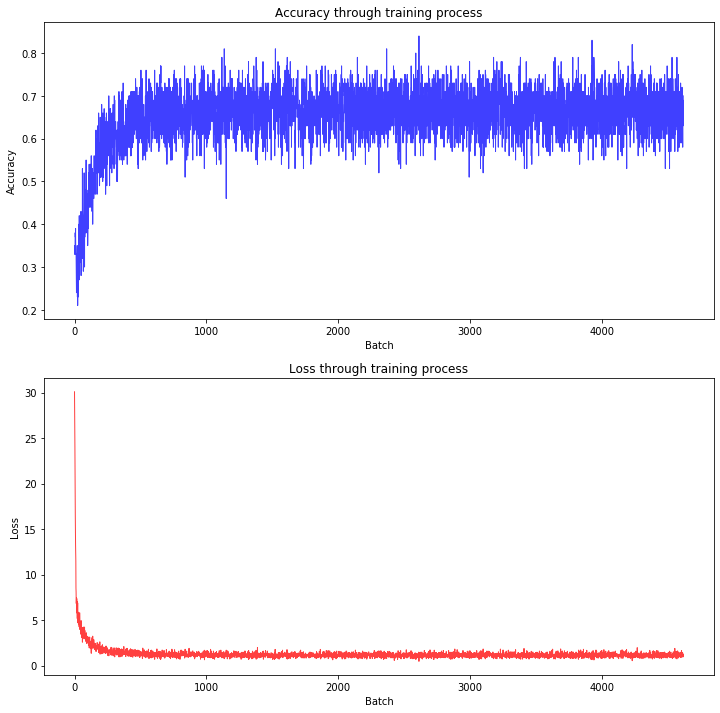

In [0]:
#Plot Train Accuracy and Loss (Batches)
fig, ax = plt.subplots(2,1, figsize = (12,12))
ax[1].plot(range(len(A)), L, c = 'r', alpha = 0.75, linewidth = 1)
ax[1].set_title('Loss through training process')
ax[1].set_xlabel('Batch')
ax[1].set_ylabel('Loss')

ax[0].plot(range(len(A)), A, c = 'b', alpha = 0.75, linewidth = 1)
ax[0].set_title('Accuracy through training process')
ax[0].set_xlabel('Batch')
ax[0].set_ylabel('Accuracy')

Text(0, 0.5, 'Size')

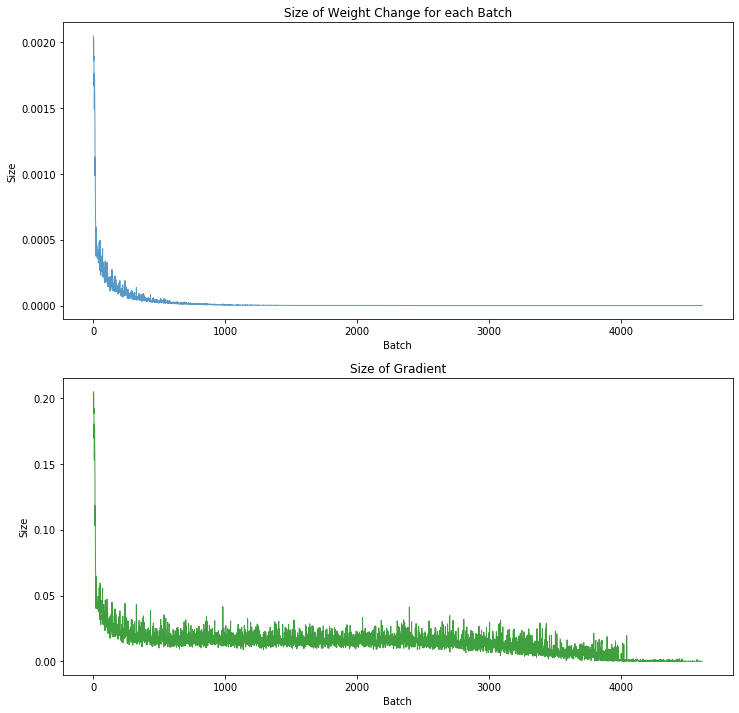

In [0]:
fig2, ax2 = plt.subplots(2,1, figsize = (12,12))
ax2[0].plot(range(len(W_change)), W_change, alpha = 0.75, linewidth = 1)
ax2[0].set_title('Size of Weight Change for each Batch')
ax2[0].set_xlabel('Batch')
ax2[0].set_ylabel('Size')

ax2[1].plot(range(len(gradient)), Gd, c = 'g', alpha = 0.75, linewidth = 1)
ax2[1].set_title('Size of Gradient')
ax2[1].set_xlabel('Batch')
ax2[1].set_ylabel('Size')

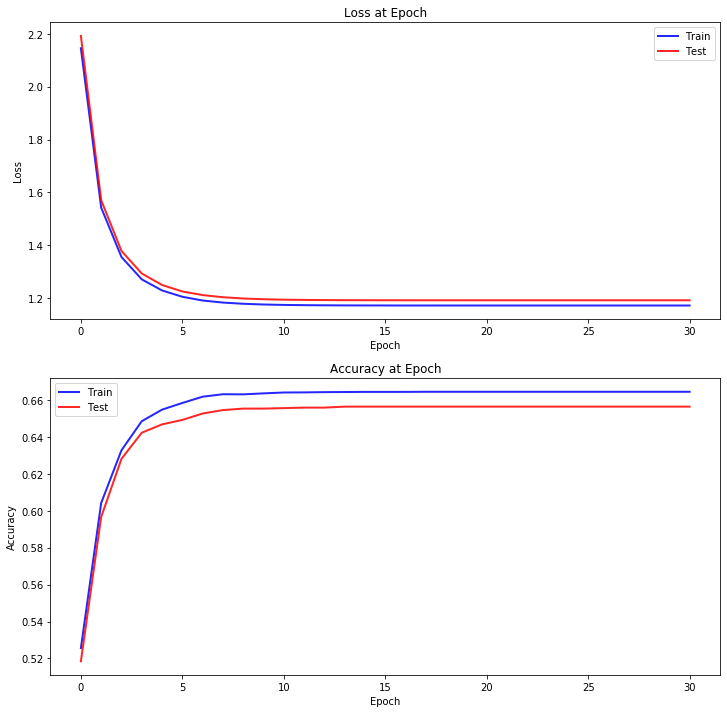

In [0]:
#Plot Train and Test Accuracy on Same axes (Epochs)
length = len(accuracy_train)

fig1, ax1 = plt.subplots(2,1, figsize = (12,12))
ax1[1].plot(range(length), accuracy_train, c = 'b', alpha = 0.85, linewidth = 2)
ax1[1].plot(range(length), accuracy_test, c = 'r', alpha = 0.85, linewidth = 2)
ax1[1].set_title('Accuracy at Epoch')
ax1[1].set_xlabel('Epoch')
ax1[1].set_ylabel('Accuracy')
ax1[1].legend(['Train', 'Test'])

ax1[0].plot(range(length), loss_train, c = 'b', alpha = 0.85, linewidth = 2)
ax1[0].plot(range(length), loss_test, c = 'r', alpha = 0.85, linewidth = 2)
ax1[0].set_title('Loss at Epoch')
ax1[0].set_xlabel('Epoch')
ax1[0].set_ylabel('Loss')
ax1[0].legend(['Train', 'Test'])

In [0]:
#Look at out layer from new session
print(O_layer[[0,1,2]])

#Predictions From Training
print(predictions[[0,1,2]])

#If best test score was same as last score
print(accuracy_test[-1]==max(weight.keys()))

[[12.824171   8.616326  19.294897 ]
 [ 1.5563782  1.6556398  7.6490498]
 [-4.014332  -3.2038279 -8.682707 ]]
[[12.824171   8.616326  19.294897 ]
 [ 1.5563782  1.6556398  7.6490498]
 [-4.014332  -3.2038279 -8.682707 ]]
True


In [0]:
#Predictions in Probability form
def prob(x):
  y = np.exp(x)/(1+np.exp(x))
  return y

probabilities = np.apply_along_axis(prob, 0, O_layer)
np.round(probabilities, 3)

array([[1.   , 1.   , 1.   ],
       [0.826, 0.84 , 1.   ],
       [0.018, 0.039, 0.   ],
       ...,
       [1.   , 0.984, 0.974],
       [1.   , 1.   , 1.   ],
       [0.95 , 0.998, 0.999]], dtype=float32)

In [0]:
#Used change in weights as a deal breaker
        #Change in average of last 3 weights
        if len(accuracy_test) >= 3:
          sliding_avg += [np.mean(accuracy_test[-3:])]
          if len(sliding_avg) >= 2:
            diff_slid_avg = sliding_avg[-1] - sliding_avg[-2]      